<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Train Practice

## *Data Science Unit 4 Sprint 2 Assignment 2*

Continue to use TensorFlow Keras & a sample of the [Quickdraw dataset](https://github.com/googlecreativelab/quickdraw-dataset) to build a sketch classification model. The dataset has been sampled to only 10 classes and 10000 observations per class. Please build a baseline classification model then run a few experiments with different optimizers and learning rates. 

*Don't forgot to switch to GPU on Colab!*

### Write a function to load your data

Wrap yesterday's preprocessing steps into a function that returns four items:
* X_train
* y_train
* X_test
* y_test

Your function should accept a `path` to the data as a argument.

In [ ]:
# Imports 
import io
import requests
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Tensorflow
import tensorflow as tf 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, Adamax, Ftrl, Nadam, RMSprop, SGD

# Plotting
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:

def load_quickdraw10(path):
  '''
  Function to load dataset
  '''
  response = requests.get(path)
  response.raise_for_status()
  data = np.load(io.BytesIO(response.content))

  X = data['arr_0']
  y = data['arr_1']

  X = X / 255

  # Split 20% test, stratified on y
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                      stratify=y, 
                                                      random_state=42)

  return X_train, y_train, X_test, y_test

In [ ]:
X_train, y_train, X_test, y_test = load_quickdraw10(
    'https://github.com/lukiepookieofficial/DS-Unit-4-Sprint-2-Neural-Networks/blob/main/quickdraw10.npz?raw=true')

# Look at the size of all my data now
print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('X_test: ', X_test.shape)
print('y_test: ', y_test.shape)

X_train:  (80000, 784)
y_train:  (80000,)
X_test:  (20000, 784)
y_test:  (20000,)


### Write a Model Function
Using your model from yesterday, write a function called `create_model` which returns a compiled TensorFlow Keras Sequential Model suitable for classifying the QuickDraw-10 dataset. Include parameters for the following: 
* Learning Rate
* Optimizer

In [ ]:

def create_model(act, lr, opt):
  '''
  Function to return a compiled TensorFlow Keras Sequential
    model for classifying the QuickDraw-10 dataset.

  Args:
    act : string : Activator for the hidden layers of the model
    lr  : int    : Learning rate for the optimizer
    opt : class  : Optimizer to run on the model
  '''
  # Instantiate the model
  model = Sequential([
                      Dense(128, activation=act, input_dim=784),
                      Dense(64, activation=act),
                      Dense(32, activation=act),
                      Dense(10, activation='softmax')
  ])

  model.compile(loss='sparse_categorical_crossentropy',
                optimizer=opt(learning_rate=lr),
                metrics=['accuracy'])
  
  return model

# Use function to create a default model
model = create_model('relu', 0.01, SGD)

# Look at the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 111,146
Trainable params: 111,146
Non-trainable params: 0
_________________________________________________________________


### Experiment with Batch Size
* Run 5 experiments with various batch sizes of your choice. 
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against your model's performance yesterday. 

In [ ]:
# Use function to create a default model
model = create_model('relu', 0.01, SGD)

# Batch size experiment #1
bs32 = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=32,
  validation_data=(X_test, y_test)
)

Epoch 1/25
2500/2500 [==============================] - 5s 2ms/step - loss: 1.0894 - accuracy: 0.6668 - val_loss: 0.8041 - val_accuracy: 0.7652
Epoch 2/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.7387 - accuracy: 0.7820 - val_loss: 0.6642 - val_accuracy: 0.8058
Epoch 3/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.6354 - accuracy: 0.8126 - val_loss: 0.5931 - val_accuracy: 0.8242
Epoch 4/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5671 - accuracy: 0.8329 - val_loss: 0.5542 - val_accuracy: 0.8354
Epoch 5/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.5213 - accuracy: 0.8455 - val_loss: 0.5169 - val_accuracy: 0.8460
Epoch 6/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4868 - accuracy: 0.8562 - val_loss: 0.5145 - val_accuracy: 0.8468
Epoch 7/25
2500/2500 [==============================] - 4s 2ms/step - loss: 0.4595 - accuracy: 0.8640 - val_loss: 0.4798 - val_accuracy:

In [ ]:
# Use function to create a default model
model = create_model('relu', 0.01, SGD)

# Batch size experiment #2
bs256 = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=256,
  validation_data=(X_test, y_test)
)

Epoch 1/25
313/313 [==============================] - 2s 5ms/step - loss: 2.0617 - accuracy: 0.3143 - val_loss: 1.6522 - val_accuracy: 0.5396
Epoch 2/25
313/313 [==============================] - 1s 5ms/step - loss: 1.3242 - accuracy: 0.6152 - val_loss: 1.1124 - val_accuracy: 0.6623
Epoch 3/25
313/313 [==============================] - 1s 5ms/step - loss: 1.0399 - accuracy: 0.6888 - val_loss: 0.9617 - val_accuracy: 0.7093
Epoch 4/25
313/313 [==============================] - 1s 5ms/step - loss: 0.9350 - accuracy: 0.7239 - val_loss: 0.8927 - val_accuracy: 0.7380
Epoch 5/25
313/313 [==============================] - 1s 5ms/step - loss: 0.8778 - accuracy: 0.7431 - val_loss: 0.8462 - val_accuracy: 0.7494
Epoch 6/25
313/313 [==============================] - 1s 5ms/step - loss: 0.8387 - accuracy: 0.7556 - val_loss: 0.8125 - val_accuracy: 0.7614
Epoch 7/25
313/313 [==============================] - 1s 5ms/step - loss: 0.8085 - accuracy: 0.7652 - val_loss: 0.7895 - val_accuracy: 0.7707
Epoch 

In [ ]:
# Use function to create a default model
model = create_model('relu', 0.01, SGD)

# Batch size experiment #3
bs512 = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=512,
  validation_data=(X_test, y_test)
)

Epoch 1/25
157/157 [==============================] - 1s 9ms/step - loss: 2.1686 - accuracy: 0.2211 - val_loss: 1.9721 - val_accuracy: 0.3038
Epoch 2/25
157/157 [==============================] - 1s 8ms/step - loss: 1.7818 - accuracy: 0.3782 - val_loss: 1.5952 - val_accuracy: 0.4576
Epoch 3/25
157/157 [==============================] - 1s 8ms/step - loss: 1.4674 - accuracy: 0.5384 - val_loss: 1.3403 - val_accuracy: 0.5940
Epoch 4/25
157/157 [==============================] - 1s 8ms/step - loss: 1.2637 - accuracy: 0.6221 - val_loss: 1.1773 - val_accuracy: 0.6484
Epoch 5/25
157/157 [==============================] - 1s 8ms/step - loss: 1.1311 - accuracy: 0.6644 - val_loss: 1.0719 - val_accuracy: 0.6804
Epoch 6/25
157/157 [==============================] - 1s 8ms/step - loss: 1.0456 - accuracy: 0.6909 - val_loss: 1.0023 - val_accuracy: 0.7010
Epoch 7/25
157/157 [==============================] - 1s 8ms/step - loss: 0.9870 - accuracy: 0.7093 - val_loss: 0.9543 - val_accuracy: 0.7167
Epoch 

In [ ]:

# Use function to create a default model
model = create_model('relu', 0.01, SGD)

# Batch size experiment #4
bs64 = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/25
1250/1250 [==============================] - 3s 2ms/step - loss: 1.3036 - accuracy: 0.5968 - val_loss: 0.8941 - val_accuracy: 0.7369
Epoch 2/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.8461 - accuracy: 0.7536 - val_loss: 0.7785 - val_accuracy: 0.7725
Epoch 3/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.7577 - accuracy: 0.7808 - val_loss: 0.7143 - val_accuracy: 0.7914
Epoch 4/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6975 - accuracy: 0.7981 - val_loss: 0.6642 - val_accuracy: 0.8043
Epoch 5/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6507 - accuracy: 0.8105 - val_loss: 0.6302 - val_accuracy: 0.8149
Epoch 6/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.6125 - accuracy: 0.8204 - val_loss: 0.5958 - val_accuracy: 0.8223
Epoch 7/25
1250/1250 [==============================] - 3s 2ms/step - loss: 0.5814 - accuracy: 0.8293 - val_loss: 0.5701 - val_accuracy:

In [ ]:

# Use function to create a default model
model = create_model('relu', 0.01, SGD)

# Batch size experiment #5
bs8 = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=8,
  validation_data=(X_test, y_test)
)

Epoch 1/25
10000/10000 [==============================] - 15s 1ms/step - loss: 0.8096 - accuracy: 0.7529 - val_loss: 0.5774 - val_accuracy: 0.8255
Epoch 2/25
10000/10000 [==============================] - 15s 2ms/step - loss: 0.5453 - accuracy: 0.8354 - val_loss: 0.5228 - val_accuracy: 0.8419
Epoch 3/25
10000/10000 [==============================] - 15s 2ms/step - loss: 0.4698 - accuracy: 0.8568 - val_loss: 0.4841 - val_accuracy: 0.8514
Epoch 4/25
10000/10000 [==============================] - 14s 1ms/step - loss: 0.4223 - accuracy: 0.8713 - val_loss: 0.4546 - val_accuracy: 0.8617
Epoch 5/25
10000/10000 [==============================] - 14s 1ms/step - loss: 0.3866 - accuracy: 0.8826 - val_loss: 0.4469 - val_accuracy: 0.8651
Epoch 6/25
10000/10000 [==============================] - 15s 1ms/step - loss: 0.3587 - accuracy: 0.8911 - val_loss: 0.4478 - val_accuracy: 0.8694
Epoch 7/25
10000/10000 [==============================] - 14s 1ms/step - loss: 0.3356 - accuracy: 0.8987 - val_loss: 0

In [ ]:

# Use function to create a default model
model = create_model('relu', 0.01, SGD)

# Batch size experiment #6
bs128 = model.fit(
  X_train, y_train,
  epochs=25,
  batch_size=128,
  validation_data=(X_test, y_test)
)

Epoch 1/25
625/625 [==============================] - 2s 3ms/step - loss: 1.6880 - accuracy: 0.4338 - val_loss: 1.1792 - val_accuracy: 0.6385
Epoch 2/25
625/625 [==============================] - 2s 3ms/step - loss: 1.0372 - accuracy: 0.6882 - val_loss: 0.9137 - val_accuracy: 0.7286
Epoch 3/25
625/625 [==============================] - 2s 3ms/step - loss: 0.8823 - accuracy: 0.7394 - val_loss: 0.8251 - val_accuracy: 0.7584
Epoch 4/25
625/625 [==============================] - 2s 3ms/step - loss: 0.8145 - accuracy: 0.7640 - val_loss: 0.7762 - val_accuracy: 0.7720
Epoch 5/25
625/625 [==============================] - 2s 3ms/step - loss: 0.7701 - accuracy: 0.7778 - val_loss: 0.7391 - val_accuracy: 0.7850
Epoch 6/25
625/625 [==============================] - 2s 3ms/step - loss: 0.7356 - accuracy: 0.7876 - val_loss: 0.7128 - val_accuracy: 0.7922
Epoch 7/25
625/625 [==============================] - 2s 3ms/step - loss: 0.7058 - accuracy: 0.7960 - val_loss: 0.6855 - val_accuracy: 0.8007
Epoch 

In [ ]:
batch_sizes = []

for exp, result in zip([bs8, bs32, bs64, bs128, bs256, bs512], 
                       ["8_", "32_", "64_", "128_", "256_", "512_"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Batch Size'] = result
    batch_sizes.append(df)

df = pd.concat(batch_sizes)
df['Batch Size'] = df['Batch Size'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Batch Size
0,0.809606,0.752925,0.577359,0.82550,0,8_
1,0.545264,0.835375,0.522800,0.84190,1,8_
2,0.469756,0.856812,0.484097,0.85140,2,8_
3,0.422279,0.871350,0.454624,0.86170,3,8_
4,0.386627,0.882600,0.446885,0.86515,4,8_


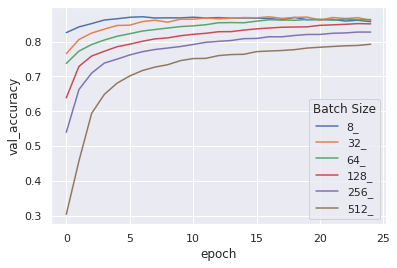

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Batch Size', data=df);

/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:507: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:522: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:507: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:522: MatplotlibDeprecationWarning: Saw kwargs ['c', 'col

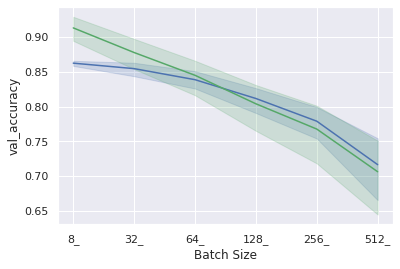

In [ ]:
sns.lineplot(x='Batch Size', y='val_accuracy', data=df, c='b')
sns.lineplot(x='Batch Size', y='accuracy', data=df, c='g');

### Experiment with Learning Rate
* Run 5 experiments with various learning rate magnitudes: 1, .1, .01, .001, .0001.
* Use the "best" batch size from the previous experiment
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday. 

In [ ]:

# Use function to create a default model
model = create_model('relu', 0.1, SGD)

# Learning Rate experiment #1
bs64_1 = model.fit(
  X_train, y_train,
  epochs=20,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.7717 - accuracy: 0.7604 - val_loss: 0.5655 - val_accuracy: 0.8292
Epoch 2/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.5234 - accuracy: 0.8402 - val_loss: 0.4856 - val_accuracy: 0.8521
Epoch 3/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4537 - accuracy: 0.8616 - val_loss: 0.4753 - val_accuracy: 0.8579
Epoch 4/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4080 - accuracy: 0.8758 - val_loss: 0.4492 - val_accuracy: 0.8625
Epoch 5/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3739 - accuracy: 0.8855 - val_loss: 0.4618 - val_accuracy: 0.8618
Epoch 6/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3465 - accuracy: 0.8925 - val_loss: 0.4322 - val_accuracy: 0.8709
Epoch 7/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3236 - accuracy: 0.9005 - val_loss: 0.4344 - val_accuracy:

In [ ]:
# Use function to create a default model
model = create_model('relu', 0.25, SGD)

# Learning Rate experiment #2
bs64_25 = model.fit(
  X_train, y_train,
  epochs=20,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.7323 - accuracy: 0.7705 - val_loss: 0.5443 - val_accuracy: 0.8345
Epoch 2/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4950 - accuracy: 0.8486 - val_loss: 0.4810 - val_accuracy: 0.8548
Epoch 3/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4292 - accuracy: 0.8690 - val_loss: 0.4921 - val_accuracy: 0.8512
Epoch 4/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3889 - accuracy: 0.8802 - val_loss: 0.4420 - val_accuracy: 0.8685
Epoch 5/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3586 - accuracy: 0.8906 - val_loss: 0.4469 - val_accuracy: 0.8702
Epoch 6/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3321 - accuracy: 0.8981 - val_loss: 0.4481 - val_accuracy: 0.8719
Epoch 7/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3128 - accuracy: 0.9029 - val_loss: 0.4446 - val_accuracy:

In [ ]:

# Use function to create a default model
model = create_model('relu', 0.3, SGD)

# Learning Rate experiment #3
bs64_3 = model.fit(
  X_train, y_train,
  epochs=20,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.7147 - accuracy: 0.7764 - val_loss: 0.5377 - val_accuracy: 0.8353
Epoch 2/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4950 - accuracy: 0.8475 - val_loss: 0.4749 - val_accuracy: 0.8554
Epoch 3/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4299 - accuracy: 0.8676 - val_loss: 0.4606 - val_accuracy: 0.8570
Epoch 4/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3887 - accuracy: 0.8802 - val_loss: 0.4605 - val_accuracy: 0.8605
Epoch 5/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3592 - accuracy: 0.8897 - val_loss: 0.4617 - val_accuracy: 0.8658
Epoch 6/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3350 - accuracy: 0.8967 - val_loss: 0.4433 - val_accuracy: 0.8681
Epoch 7/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3130 - accuracy: 0.9040 - val_loss: 0.4565 - val_accuracy:

In [ ]:
# Use function to create a default model
model = create_model('relu', 0.001, SGD)

# Learning Rate experiment #4
bs64_001 = model.fit(
  X_train, y_train,
  epochs=20,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/20
1250/1250 [==============================] - 3s 2ms/step - loss: 2.2207 - accuracy: 0.2137 - val_loss: 2.0975 - val_accuracy: 0.3433
Epoch 2/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.9385 - accuracy: 0.4235 - val_loss: 1.7587 - val_accuracy: 0.4912
Epoch 3/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.5894 - accuracy: 0.5231 - val_loss: 1.4337 - val_accuracy: 0.5535
Epoch 4/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.3372 - accuracy: 0.5905 - val_loss: 1.2475 - val_accuracy: 0.6194
Epoch 5/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.1949 - accuracy: 0.6389 - val_loss: 1.1341 - val_accuracy: 0.6548
Epoch 6/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.1002 - accuracy: 0.6708 - val_loss: 1.0519 - val_accuracy: 0.6830
Epoch 7/20
1250/1250 [==============================] - 3s 2ms/step - loss: 1.0303 - accuracy: 0.6933 - val_loss: 0.9904 - val_accuracy:

In [ ]:

# Use function to create a default model
model = create_model('relu', 0.5, SGD)

# Learning Rate experiment #5
bs64_5 = model.fit(
  X_train, y_train,
  epochs=20,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.7316 - accuracy: 0.7705 - val_loss: 0.6619 - val_accuracy: 0.7987
Epoch 2/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.5039 - accuracy: 0.8450 - val_loss: 0.5131 - val_accuracy: 0.8482
Epoch 3/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4461 - accuracy: 0.8632 - val_loss: 0.5116 - val_accuracy: 0.8485
Epoch 4/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4102 - accuracy: 0.8741 - val_loss: 0.4794 - val_accuracy: 0.8529
Epoch 5/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3813 - accuracy: 0.8821 - val_loss: 0.4751 - val_accuracy: 0.8601
Epoch 6/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3565 - accuracy: 0.8904 - val_loss: 0.4607 - val_accuracy: 0.8622
Epoch 7/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3377 - accuracy: 0.8944 - val_loss: 0.4626 - val_accuracy:

In [ ]:

# Use function to create a default model
model = create_model('relu', 0.75, SGD)

# Learning Rate experiment #6
bs64_75 = model.fit(
  X_train, y_train,
  epochs=20,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.8043 - accuracy: 0.7446 - val_loss: 0.5861 - val_accuracy: 0.8209
Epoch 2/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.5506 - accuracy: 0.8328 - val_loss: 0.5343 - val_accuracy: 0.8421
Epoch 3/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4947 - accuracy: 0.8505 - val_loss: 0.5103 - val_accuracy: 0.8475
Epoch 4/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4593 - accuracy: 0.8597 - val_loss: 0.5039 - val_accuracy: 0.8526
Epoch 5/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4326 - accuracy: 0.8687 - val_loss: 0.5115 - val_accuracy: 0.8464
Epoch 6/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.4146 - accuracy: 0.8743 - val_loss: 0.5022 - val_accuracy: 0.8549
Epoch 7/20
1250/1250 [==============================] - 3s 2ms/step - loss: 0.3960 - accuracy: 0.8793 - val_loss: 0.5299 - val_accuracy:

In [ ]:

learning_rate = []

for exp, result in zip([bs64_001, bs64_1, bs64_25, bs64_3, bs64_5, bs64_75], 
                       [".001", ".1", ".25", ".3", ".5", ".75"]):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Learning Rate'] = result
    learning_rate.append(df)

df = pd.concat(learning_rate)
df['Learning Rate'] = df['Learning Rate'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Learning Rate
0,2.220710,0.213650,2.097535,0.34335,0,.001
1,1.938467,0.423537,1.758717,0.49120,1,.001
2,1.589365,0.523125,1.433685,0.55350,2,.001
3,1.337235,0.590500,1.247513,0.61940,3,.001
4,1.194865,0.638875,1.134122,0.65480,4,.001


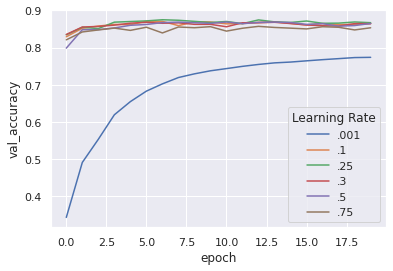

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Learning Rate', data=df);

/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:507: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:522: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:507: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:522: MatplotlibDeprecationWarning: Saw kwargs ['c', 'col

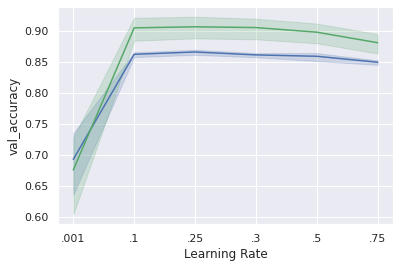

In [ ]:
sns.lineplot(x='Learning Rate', y='val_accuracy', data=df, c='b')
sns.lineplot(x='Learning Rate', y='accuracy', data=df, c='g');

### Experiment with different Optimizers
* Run 5 experiments with various optimizers available in TensorFlow. See list [here](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)
* Visualize the results
* Write up an analysis of the experiments and select the "best" performing model among your experiments. Make sure to compare against the previous experiments and your model's performance yesterday.
* Repeat the experiment combining Learning Rate and different optimizers. Does the best performing model change? 

In [ ]:

# Use function to create a default model
model = create_model('relu', 0.01, Adam)

# Optimizer experiment #1
bs64_Adam = model.fit(
  X_train, y_train,
  epochs=20,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6879 - accuracy: 0.7916 - val_loss: 0.5616 - val_accuracy: 0.8321
Epoch 2/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.5395 - accuracy: 0.8401 - val_loss: 0.5474 - val_accuracy: 0.8469
Epoch 3/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4991 - accuracy: 0.8522 - val_loss: 0.5240 - val_accuracy: 0.8465
Epoch 4/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4740 - accuracy: 0.8599 - val_loss: 0.5014 - val_accuracy: 0.8564
Epoch 5/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4595 - accuracy: 0.8644 - val_loss: 0.5486 - val_accuracy: 0.8425
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4409 - accuracy: 0.8695 - val_loss: 0.5278 - val_accuracy: 0.8497
Epoch 7/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.4271 - accuracy: 0.8740 - val_loss: 0.5286 - val_accuracy:

In [ ]:

# Use function to create a default model
model = create_model('relu', 0.01, Adamax)

# Optimizer experiment #2
bs64_Adamax = model.fit(
  X_train, y_train,
  epochs=20,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.6796 - accuracy: 0.7918 - val_loss: 0.5434 - val_accuracy: 0.8359
Epoch 2/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4889 - accuracy: 0.8508 - val_loss: 0.4892 - val_accuracy: 0.8519
Epoch 3/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.4308 - accuracy: 0.8678 - val_loss: 0.4567 - val_accuracy: 0.8608
Epoch 4/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3916 - accuracy: 0.8801 - val_loss: 0.4481 - val_accuracy: 0.8639
Epoch 5/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3631 - accuracy: 0.8884 - val_loss: 0.4519 - val_accuracy: 0.8643
Epoch 6/20
1250/1250 [==============================] - 3s 3ms/step - loss: 0.3390 - accuracy: 0.8956 - val_loss: 0.4489 - val_accuracy: 0.8676
Epoch 7/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.3200 - accuracy: 0.9014 - val_loss: 0.4544 - val_accuracy:

In [ ]:

# Use function to create a default model
model = create_model('relu', 0.01, Ftrl)

# Optimizer experiment #3
bs64_Ftrl = model.fit(
  X_train, y_train,
  epochs=20,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3026 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3026 - accuracy: 0.0982 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3026 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3026 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3026 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/20
1250/1250 [==============================] - 4s 3ms/step - loss: 2.3026 - accuracy: 0.0966 - val_loss: 2.3026 - val_accuracy:

In [ ]:

# Use function to create a default model
model = create_model('relu', 0.01, Nadam)

# Optimizer experiment #4
bs64_Nadam = model.fit(
  X_train, y_train,
  epochs=20,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.6829 - accuracy: 0.7908 - val_loss: 0.5560 - val_accuracy: 0.8350
Epoch 2/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.5318 - accuracy: 0.8411 - val_loss: 0.5107 - val_accuracy: 0.8500
Epoch 3/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4959 - accuracy: 0.8515 - val_loss: 0.5188 - val_accuracy: 0.8485
Epoch 4/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4656 - accuracy: 0.8620 - val_loss: 0.5367 - val_accuracy: 0.8488
Epoch 5/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4484 - accuracy: 0.8675 - val_loss: 0.5120 - val_accuracy: 0.8551
Epoch 6/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4270 - accuracy: 0.8734 - val_loss: 0.5198 - val_accuracy: 0.8505
Epoch 7/20
1250/1250 [==============================] - 5s 4ms/step - loss: 0.4135 - accuracy: 0.8778 - val_loss: 0.5112 - val_accuracy:

In [ ]:
# Use function to create a default model
model = create_model('relu', 0.01, RMSprop)

# Optimizer experiment #5
bs64_RMSprop = model.fit(
  X_train, y_train,
  epochs=20,
  batch_size=64,
  validation_data=(X_test, y_test)
)

Epoch 1/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.7673 - accuracy: 0.7724 - val_loss: 0.6464 - val_accuracy: 0.8076
Epoch 2/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6408 - accuracy: 0.8226 - val_loss: 0.6274 - val_accuracy: 0.8223
Epoch 3/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6233 - accuracy: 0.8309 - val_loss: 0.6365 - val_accuracy: 0.8246
Epoch 4/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6082 - accuracy: 0.8370 - val_loss: 0.7204 - val_accuracy: 0.8219
Epoch 5/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6158 - accuracy: 0.8395 - val_loss: 0.8530 - val_accuracy: 0.8303
Epoch 6/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6172 - accuracy: 0.8403 - val_loss: 0.6682 - val_accuracy: 0.8323
Epoch 7/20
1250/1250 [==============================] - 4s 3ms/step - loss: 0.6334 - accuracy: 0.8389 - val_loss: 0.8739 - val_accuracy:

In [ ]:
optimize = []

for exp, result in zip([bs64_Adam, bs64_Adamax, bs64_Ftrl, bs64_Nadam, 
                        bs64_RMSprop], ['Adam', 'Adamax', 'Ftrl', 'Nadam', 
                                        'RMSprop']):
    df = pd.DataFrame.from_dict(exp.history)
    df['epoch'] = df.index.values
    df['Optimizer'] = result
    optimize.append(df)

df = pd.concat(optimize)
df['Optimizer'] = df['Optimizer'].astype('str')
df.head()

,loss,accuracy,val_loss,val_accuracy,epoch,Optimizer
0,0.687946,0.791625,0.561561,0.83210,0,Adam
1,0.539510,0.840137,0.547416,0.84695,1,Adam
2,0.499144,0.852162,0.524030,0.84655,2,Adam
3,0.473997,0.859913,0.501387,0.85640,3,Adam
4,0.459471,0.864400,0.548597,0.84255,4,Adam


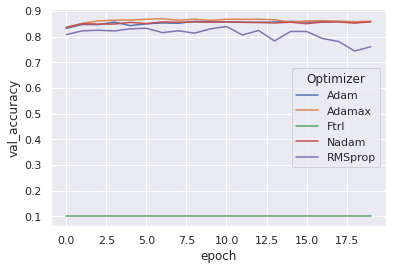

In [ ]:
sns.lineplot(x='epoch', y='val_accuracy', hue='Optimizer', data=df);

/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:507: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:522: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:507: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/usr/local/lib/python3.6/dist-packages/seaborn/relational.py:522: MatplotlibDeprecationWarning: Saw kwargs ['c', 'col

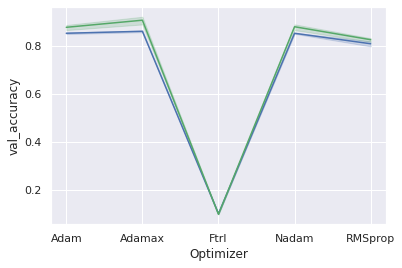

In [ ]:
sns.lineplot(x='Optimizer', y='val_accuracy', data=df, c='b')
sns.lineplot(x='Optimizer', y='accuracy', data=df, c='g');

### Additional Written Tasks

1. Describe the process of backpropagation in your own words: 
```
Your answer goes here.
```



## Stretch Goals: 

- Implement GridSearch on anyone of the experiments
- On the learning rate experiments, implement [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)
- Review material on the math behind gradient descent: 

  - Gradient Descent
    - Gradient Descent, Step-by-Step  by StatQuest w/ Josh Starmer. This will help you understand the gradient descent based optimization that happens underneath the hood of neural networks. It uses a non-neural network example, which I believe is a gentler introduction. You will hear me refer to this technique as "vanilla" gradient descent. 
    - Stochastic Gradient Descent, Clearly Explained!!! by StatQuest w/ Josh Starmer. This builds on the techniques in the previous video.  This technique is the one that is actually implemented inside modern 'nets. 
These are great resources to help you understand tomorrow's material at a deeper level. I highly recommend watching these ahead of tomorrow.

  - Background Math
    - Dot products and duality by 3Blue1Brown. Explains the core linear algebra operation happening in today's perceptron.
The paradox of the derivative by 3Blue1Brown. Does a great job explaining a derivative. 
    - Visualizing the chain rule and product rule by 3Blue1Brown. Explains the black magic that happens within Stochastic Gradient Descent. 
These math resources are very much optional. They can be very heady, but I encourage you to explore. Your understanding of neural networks will greatly increase if you understand this math background.


